# 2. Setup
https://dask.pydata.org/en/latest/setup.html  
https://hub.docker.com/r/daskdev/dask/  
https://github.com/dask/dask-docker  
https://dask.pydata.org/en/latest/setup/kubernetes.html  
https://dask.pydata.org/en/latest/setup/python-advanced.html  
https://dask.pydata.org/en/latest/setup/cli.html   

In [1]:
# import dask.dataframe as dd
# import dask.array as da
# import dask.bag as db
# from dask import delayed
# from dask.distributed import Client

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
csv_file = '2015.csv'

In [4]:
df = DataFrame({'date': pd.date_range(start = '2015-1-1', end = '2015-3-31')})
df['x'] = df.date.dt.day
df.tail()

,date,x
85,2015-03-27,27
86,2015-03-28,28
87,2015-03-29,29
88,2015-03-30,30
89,2015-03-31,31


In [5]:
df.to_csv(csv_file)

### Dask has two families of task schedulers:

1. Single machine scheduler: This scheduler provides basic features on a local process or thread pool. This scheduler was made first and is the default. It is simple and cheap to use. It can only be used on a single machine and does not scale.
2. Distributed scheduler: This scheduler is more sophisticated, offers more features, but also requires a bit more effort to set up. It can run locally or distributed across a cluster.  

If you import Dask, set up a computation, and then call compute then you will use the single-machine scheduler by default. 

In [6]:
# import dask.dataframe as dd

# df = dd.read_csv(csv_file)
# result = df.x.sum()
# result

In [7]:
# type(result)

In [8]:
# result.compute()  # This uses the single-machine scheduler by default

To use the dask.distributed scheduler you must set up a Client

In [9]:
import dask.dataframe as dd
from dask.distributed import Client

client = Client()      # Connect to distributed cluster and override default
client

Client Scheduler: tcp://127.0.0.1:54427 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.48 GB


In [10]:
type(client)

distributed.client.Client

In [11]:
client.ncores()

{'tcp://127.0.0.1:54438': 1,
 'tcp://127.0.0.1:54444': 1,
 'tcp://127.0.0.1:54448': 1,
 'tcp://127.0.0.1:54452': 1}

In [12]:
df = dd.read_csv(csv_file)
result = df.x.sum()
result

dd.Scalar<series-..., dtype=int64>

In [13]:
type(result)

dask.dataframe.core.Scalar

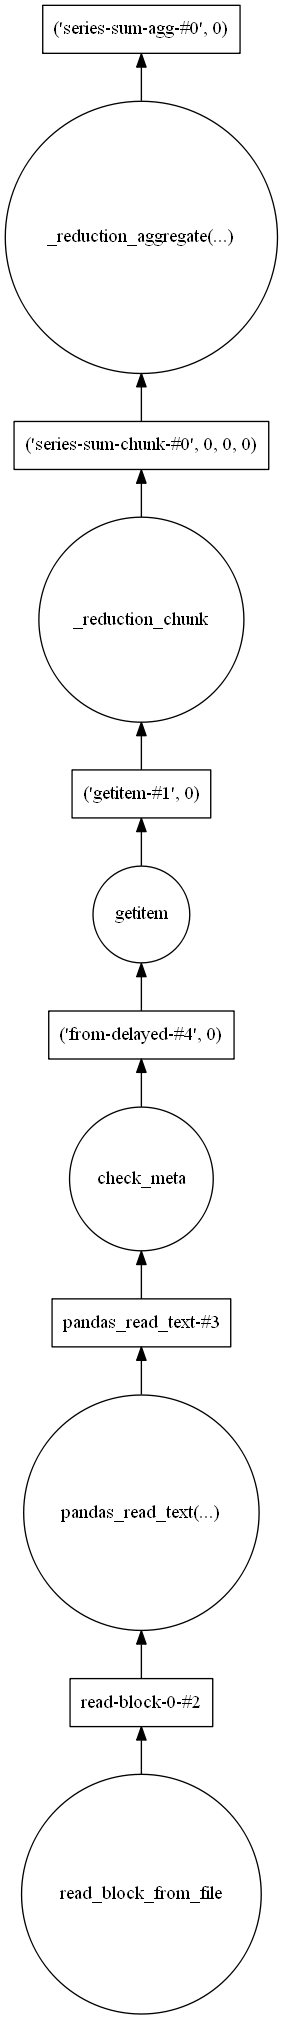

In [14]:
result.visualize()

In [15]:
result.compute()  # This uses the Distributed scheduler

1398

In [ ]:
client.close()